## **Lead Conversion Prediction with Text Features**

**Objective:** Predict the likelihood of an insurance lead converting to a customer by combining structured browsing data with unstructured text from interactions (e.g., chat logs, email inquiries).

**Dataset:** Insurance Lead Prediction dataset from Kaggle (Labellerr). This is primarily structured. Text data would need to be synthetically generated.

**Requirements:**
Feature Engineering: Create features from text: sentiment score, length of inquiry, presence of specific keywords ("quote", "price", "coverage"), and text embeddings.

**Modeling:** A model that fuses structured and textual features (e.g., a neural network with two input branches, or simply concatenating features into an XGBoost model).
Evaluation: Accuracy, Precision, Recall, F1-Score, ROC-AUC



*   Importing Libraries
*   Generating a synthetic dataset for the structured dataset
*   Reading and Interpreting Dataset
*   Treating Missing values
*   Exploratary Data Analysis
*   Feature Engineering
*   Feature Engineering on Textual column
*   Model Building






## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [5]:
plt.rcParams['figure.figsize'] = (15, 5)

## 1. Data Loading and Exploration:
The initial steps involve loading the dataset and performing exploratory data analysis (EDA) to understand its structure and characteristics.

In [6]:
df = pd.read_csv('/content/train.csv')
df = df.sample(frac = 1)
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
804,805,C10,1144,Owned,Individual,60,60,No,X2,14+,2.0,17,18300.0,1
19339,19340,C6,3282,Rented,Individual,23,23,No,X1,NaN,NaN,14,7546.0,0
47843,47844,C13,718,Owned,Joint,75,70,Yes,X1,14+,2.0,10,26163.2,0
42397,42398,C3,6015,Rented,Individual,59,59,No,X1,1.0,2.0,20,13380.0,0
33987,33988,C6,178,Rented,Individual,62,62,No,X2,NaN,NaN,22,19680.0,0


The dataset is loaded and randomized using sample(frac=1). The preliminary exploration includes obtaining information about the dataset and checking for missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50882 entries, 804 to 42129
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6), 

In [8]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [9]:
df.shape # Our dataset contains about 50882 rows and 14 columns

(50882, 14)

In [10]:
df.isnull().sum()

,0
ID,0
City_Code,0
Region_Code,0
Accomodation_Type,0
Reco_Insurance_Type,0
Upper_Age,0
Lower_Age,0
Is_Spouse,0
Health Indicator,11691
Holding_Policy_Duration,20251


3 Columns in our dataset contains null values, Our next step is to fill these null values

## 2. Data Preprocessing:
### Handling Missing Values:
Missing values in 'Health Indicator,' 'Holding_Policy_Duration,' and 'Holding_Policy_Type' are addressed.

In [11]:
df['Health Indicator'].value_counts()

,count
Health Indicator,
X1,13010
X2,10332
X3,6762
X4,5743
X5,1727
X6,1280
X7,196
X8,78
X9,63


In [12]:
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace = True)
df['Health Indicator'].isnull().sum()

np.int64(0)

For the particular Health Indicator column, all the null values will now be replaced by the mode value of the distribution, ie X1
To verify it, we run this command:

**df['Health Indicator'].isnull().sum()**

This will return the number of null values present in our Health Indicator column

In [13]:
df['Holding_Policy_Duration'].value_counts()

,count
Holding_Policy_Duration,
1.0,4499
14+,4335
2.0,4260
3.0,3586
4.0,2771
5.0,2362
6.0,1894
7.0,1645
8.0,1316


In [14]:
df['Holding_Policy_Duration'].replace(('14+'), (14.0), inplace = True)

In [15]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype('float32')


In [16]:
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].median(), inplace = True)
df['Holding_Policy_Duration'].isnull().sum()

np.int64(0)

For the particular Holding_Policy_Duration, all the null values will now be replaced by the median value of the distribution

In [17]:
df['Holding_Policy_Type'].value_counts()

,count
Holding_Policy_Type,
3.0,13279
1.0,8173
2.0,5005
4.0,4174


In [18]:
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0], inplace = True)
df['Holding_Policy_Type'].isnull().sum()

np.int64(0)

For the particular Holding_Policy_Type, all the null values will now be replaced by the mode value of the distribution, ie 3.0

In [19]:
df.isnull().sum()

,0
ID,0
City_Code,0
Region_Code,0
Accomodation_Type,0
Reco_Insurance_Type,0
Upper_Age,0
Lower_Age,0
Is_Spouse,0
Health Indicator,0
Holding_Policy_Duration,0


We have now filled all the missing values in our dataset

## 3. Exploratory Data Analysis (EDA):
The EDA section includes univariate and bivariate analysis to gain insights into the distribution of features and their relationships.

### Univariate Analysis

Response
0    38673
1    12209
Name: count, dtype: int64


<Axes: xlabel='Response', ylabel='count'>

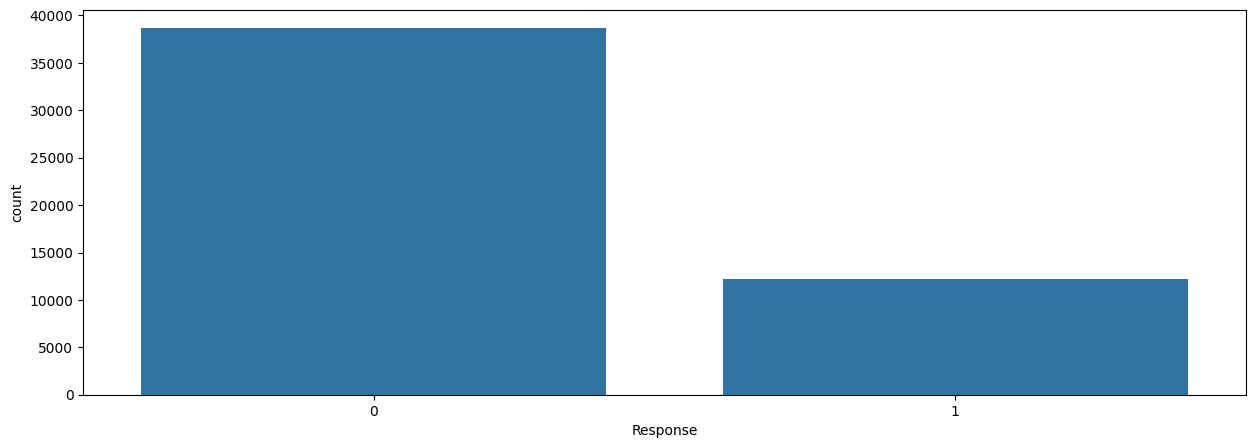

In [20]:
# Response
print(df['Response'].value_counts())
sns.countplot(data = df, x = 'Response')

#### Response:
- **Visualization:** `sns.countplot(data=df, x='Response')`
- The count plot shows a significant class imbalance, with over 38,000 instances of class 0 and around 12,000 instances of class 1. This imbalance needs consideration during model training.

<Axes: xlabel='count', ylabel='City_Code'>

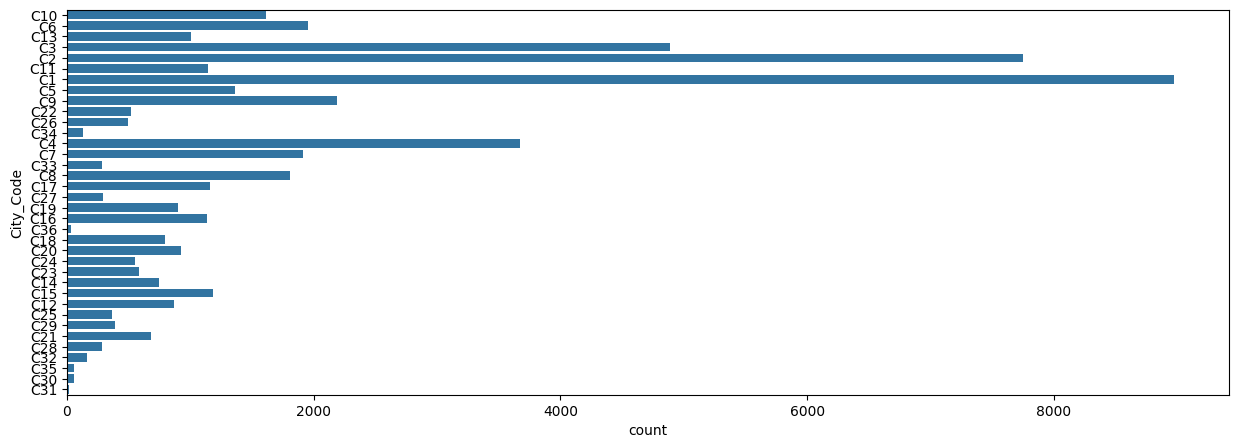

In [22]:
# City_Code
sns.countplot(df['City_Code'])

#### City_Code:
- **Visualization:** `sns.countplot(df['City_Code'])`
- City_Code 'C1' has the highest count, exceeding 8,000 instances, while some City_Codes have zero counts. This suggests a skewed distribution.


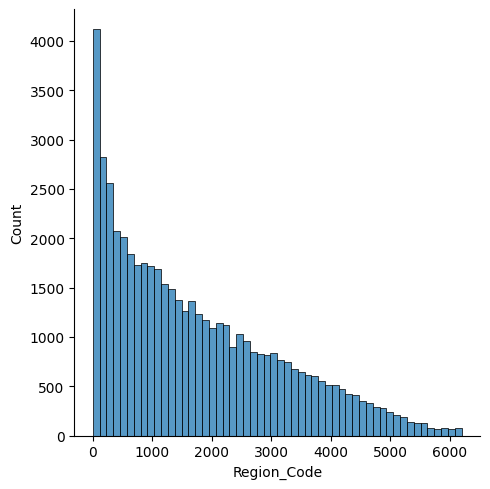

In [24]:
# Region_Code
sns.displot(df['Region_Code'])


#### Region_Code:
- **Visualization:** `sns.displot(df['Region_Code'])`
- The distribution of Region_Codes appears right-skewed, indicating certain regions with higher counts compared to others.

<Axes: xlabel='Accomodation_Type', ylabel='count'>

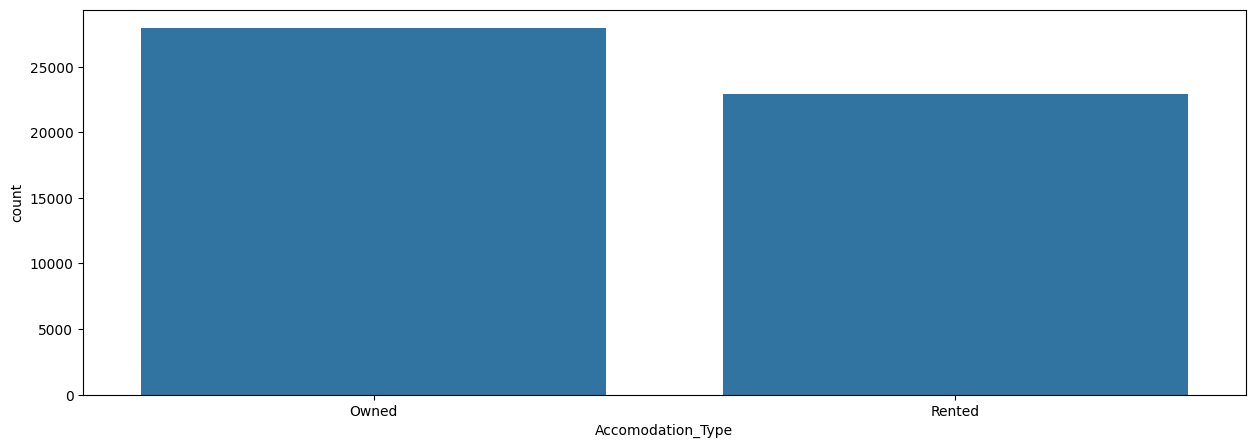

In [25]:
#Accomodation_Type
sns.countplot(data = df, x = 'Accomodation_Type')

#### Accommodation_Type:
- **Visualization:** `sns.countplot(data=df, x='Accomodation_Type')`
- The count plot reveals that the number of instances where accommodation is 'Rented' is over 20,000, whereas instances with 'Owned' exceed 25,000.

<Axes: xlabel='Reco_Insurance_Type', ylabel='count'>

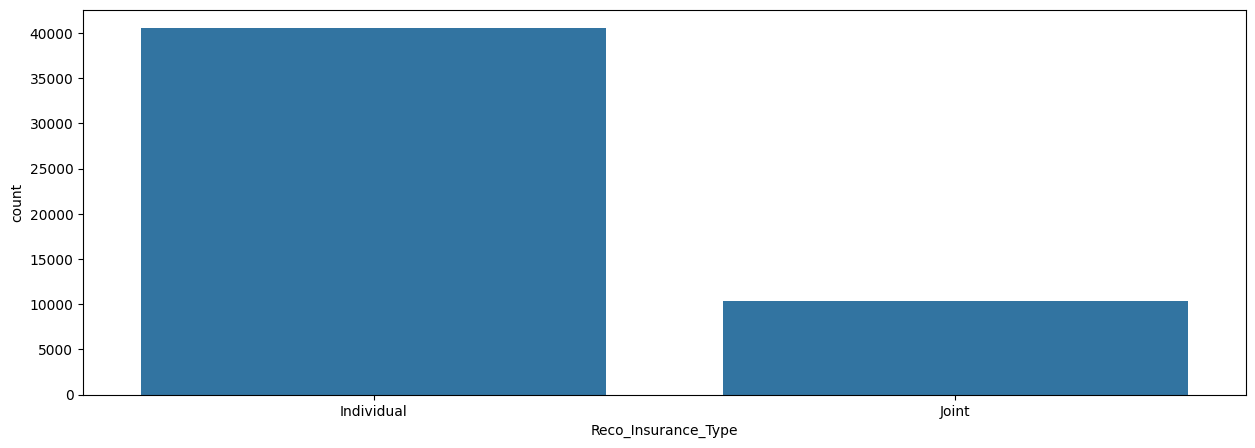

In [26]:
# Reco_Insurance_Type
sns.countplot(data = df, x = 'Reco_Insurance_Type')



#### Reco_Insurance_Type:
- **Visualization:** `sns.countplot(data=df, x='Reco_Insurance_Type')`
- The majority of instances involve 'Individual' Reco_Insurance_Type, with over 40,000 occurrences. 'Joint' Reco_Insurance_Type instances are comparatively lower, around 10,000.

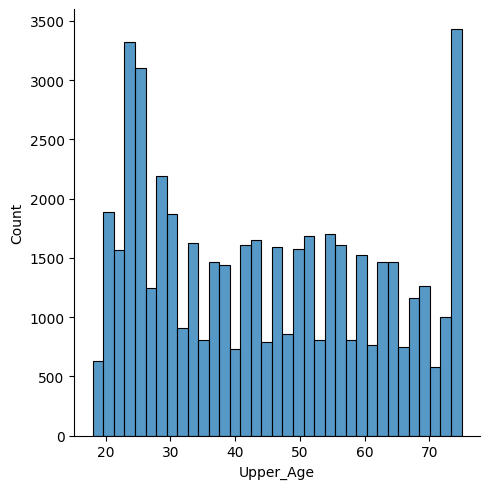

In [27]:
# Upper_Age
sns.displot(data = df, x = 'Upper_Age')

#### Upper Age:
- **Visualization:** `sns.displot(data = df, x = 'Upper_Age')`
- This histogram shows that most people in the dataset are either in their early 20s or at the upper age limit (75 years old). Ages between 30–70 are more evenly spread but less frequent. The spikes suggest possible capping or data collection bias.

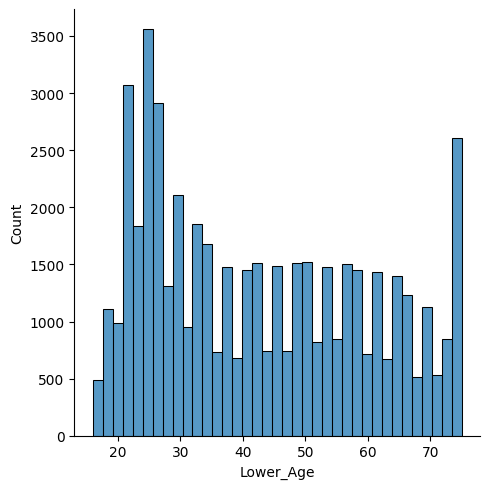

In [37]:
# Lower_Age
sns.displot(data = df, x = 'Lower_Age')

#### Upper Age:
- **Visualization:** `sns.displot(data = df, x = 'Lower_Age')`
- The dataset seems to define age ranges (Lower_Age, Upper_Age) for individuals or groups.
- Most entries describe younger adults (20–30) as their lower age, while many upper ages are set to 75 (likely a hard limit).
- This pattern is common in insurance, medical, or demographic datasets where:
Policies often start around age 18–25 and
The maximum eligible/recorded age is capped at 75.

<Axes: xlabel='Is_Spouse', ylabel='count'>

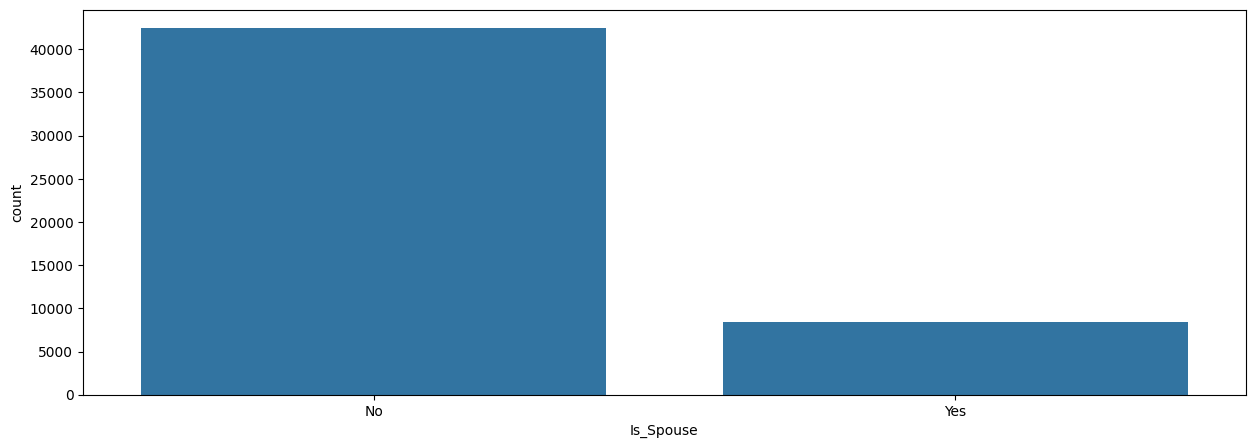

In [28]:
# Is_Spouse
sns.countplot(data = df, x = 'Is_Spouse')

#### Upper Age:
- **Visualization:** `sns.countplot(data = df, x = 'Is_Spouse')`
- A large majority (~83%) are not spouses, while only about 17% are spouses.
- This indicates that the dataset is dominated by non-spouse records
-In this dataset, it suggests most policyholders are primary individuals rather than spouse dependents.



<Axes: xlabel='Health Indicator', ylabel='count'>

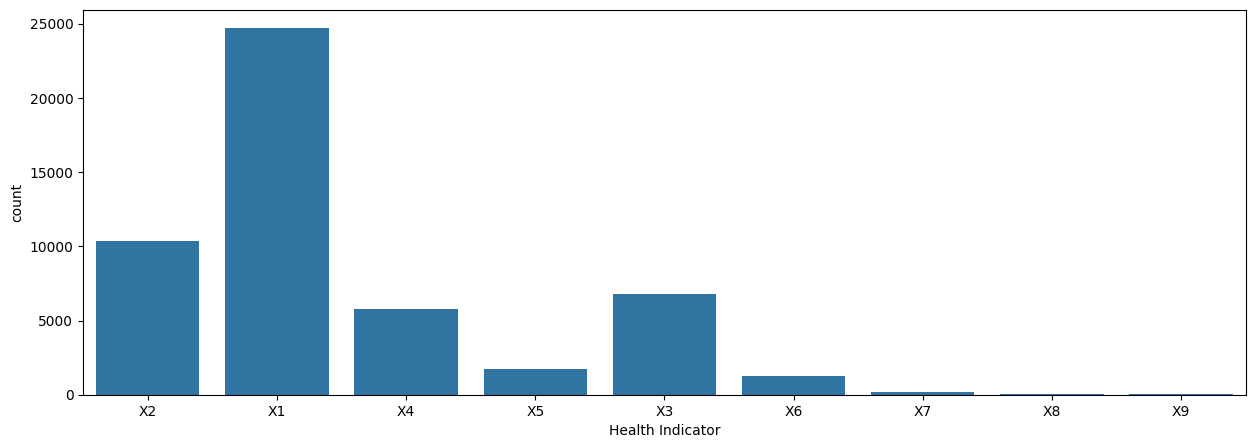

In [30]:
# Health Indicator
sns.countplot(data = df, x = 'Health Indicator')

#### Upper Age:
- **Visualization:** `sns.countplot(data = df, x = 'Health Indicator')`
- The health indicator variable is highly skewed — X1 dominates, followed by X2, while X7–X9 are almost negligible. This imbalance should be considered carefully in analysis or modeling.

<Axes: xlabel='Holding_Policy_Duration', ylabel='count'>

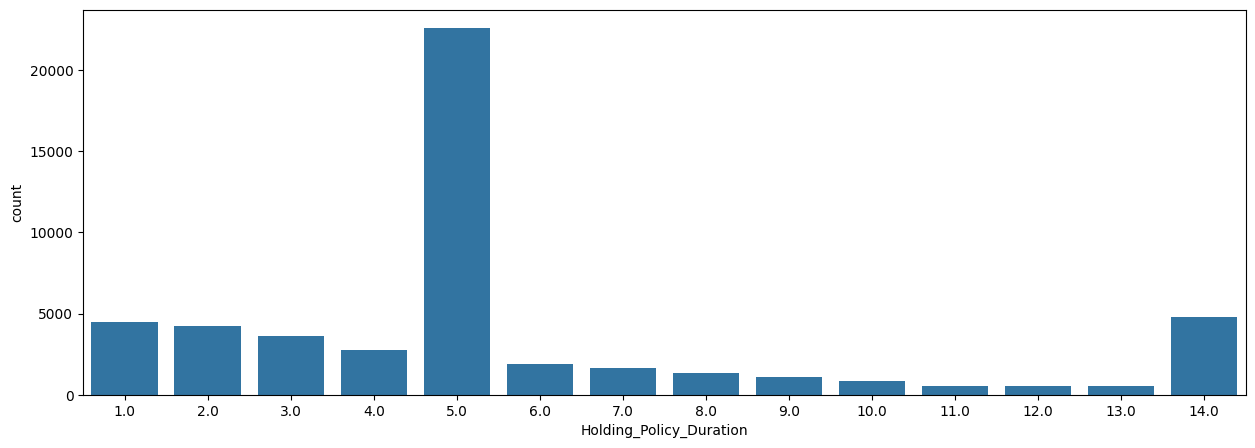

In [38]:
# Holding_Policy_Duration
sns.countplot(data = df, x = 'Holding_Policy_Duration')

The above bar chart shows the distribution of the column 'Holding_Policy_Duration', where about more than 20,000 people hold the policy duration as 5

<Axes: xlabel='Holding_Policy_Type', ylabel='count'>

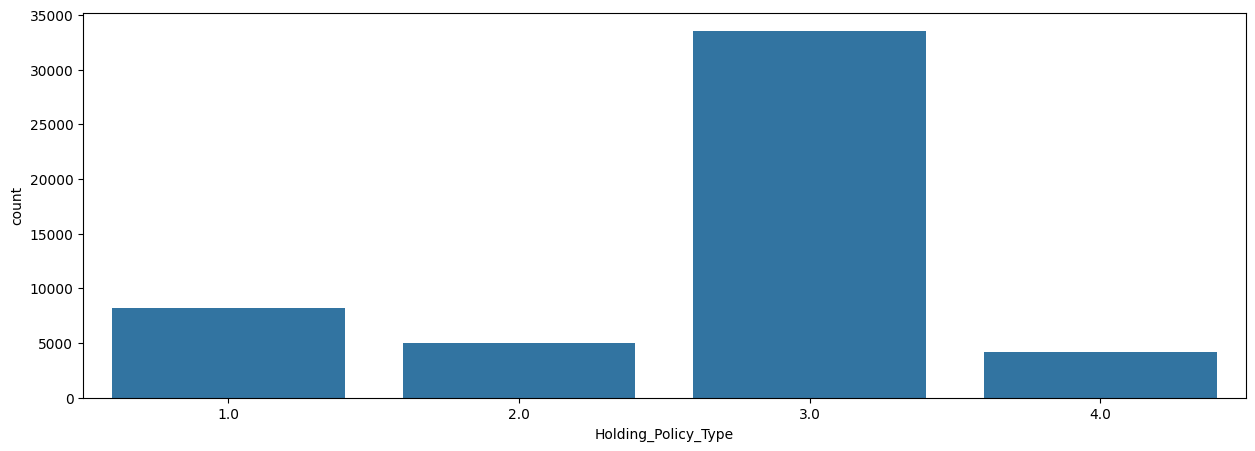

In [32]:
# Holding_Policy_Type
sns.countplot(x = 'Holding_Policy_Type', data = df)

The count plot shows that about 33,000 people holds the third policy type in majority

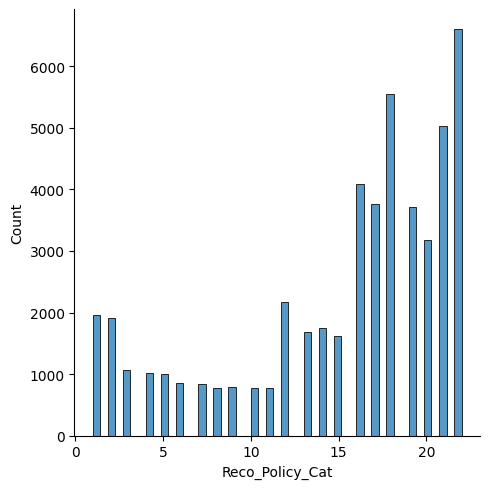

In [33]:
# Reco_Policy_Cat
sns.displot(x = 'Reco_Policy_Cat', data = df)

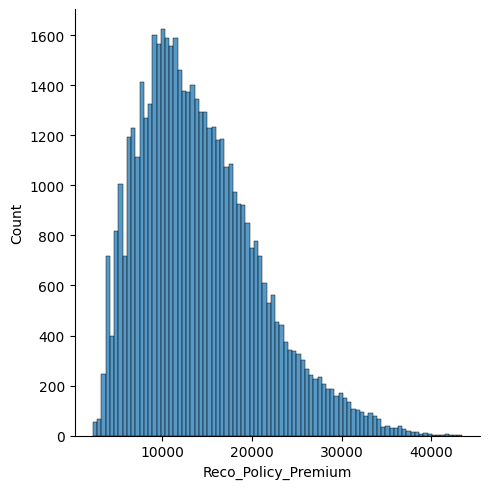

In [35]:
# Reco_Policy_Premium
sns.displot(x = 'Reco_Policy_Premium', data = df)

### Bivariate Analysis

<Axes: xlabel='City_Code', ylabel='count'>

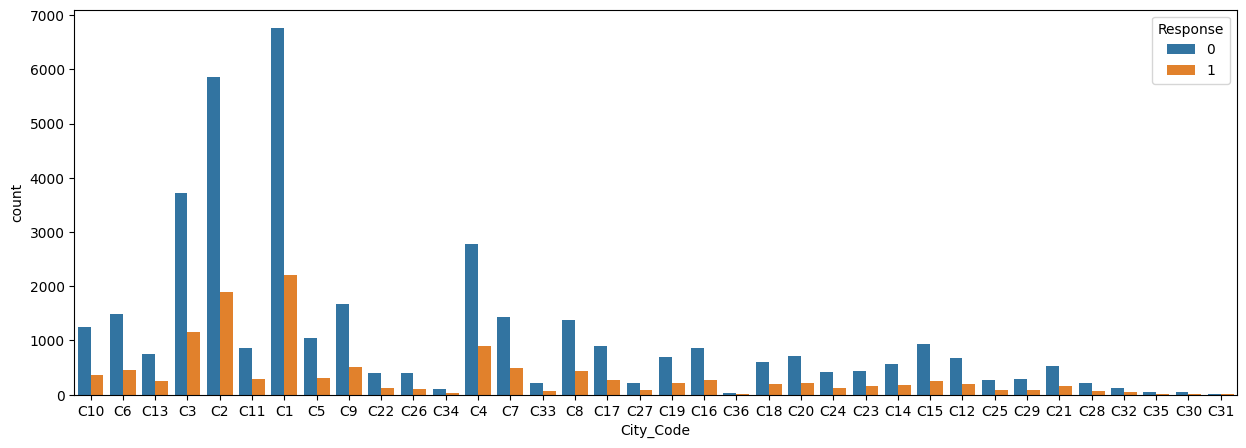

In [39]:
# City_Code vs Response
sns.countplot(x = 'City_Code', data = df, hue = 'Response')

#### City_Code vs. Response:
- **Visualization:** `sns.countplot(x='City_Code', data=df, hue='Response')`
- City_Code 'C1' exhibits the highest counts for both Response classes, indicating that it is more prevalent in both positive and negative responses.


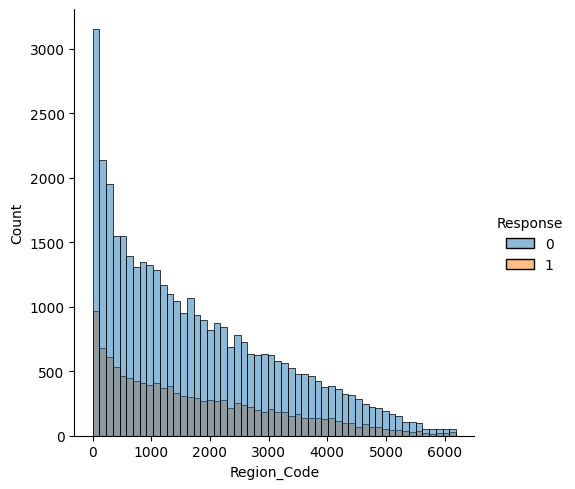

In [40]:
# Region_Code vs Response
sns.displot(x = 'Region_Code', data = df, hue = 'Response')

#### Region_Code vs. Response:
- **Visualization:** `sns.displot(x='Region_Code', data=data, hue='Response')`
- The right-skewed distribution suggests that certain regions have a higher likelihood of positive responses.

<Axes: xlabel='Accomodation_Type', ylabel='count'>

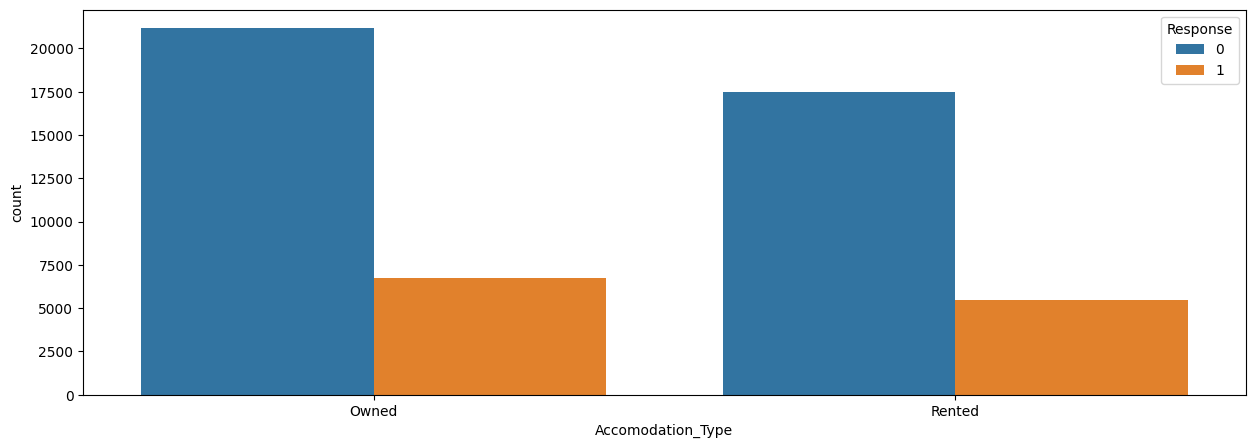

In [41]:
# Accomodation_Type vs Response
sns.countplot( x = 'Accomodation_Type', data = df, hue = 'Response')

#### Accommodation_Type vs. Response:
- **Visualization:** `sns.countplot(x='Accomodation_Type', data=data, hue='Response')`
- Instances where accommodation is 'Owned' seem to have a slightly higher positive response rate compared to 'Rented.'

<Axes: xlabel='Reco_Insurance_Type', ylabel='count'>

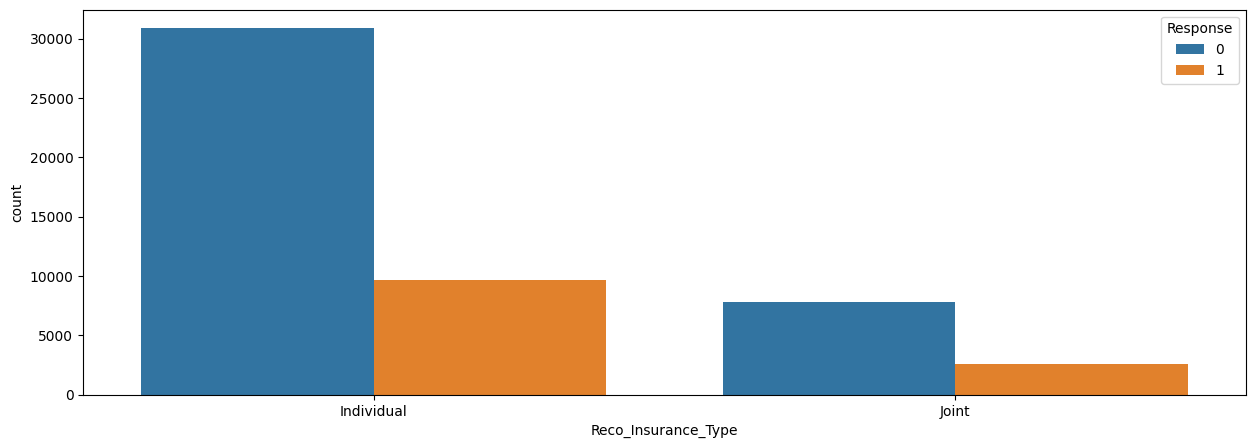

In [43]:
# Reco_Insurance_Type vs Response
sns.countplot(x = 'Reco_Insurance_Type', data = df,hue = 'Response')

#### Reco_Insurance_Type vs. Response:
- **Visualization:** `sns.countplot(x='Reco_Insurance_Type', data=df, hue='Response')`
- The 'Individual' Reco_Insurance_Type has a higher positive response rate compared to 'Joint,' which shows a notably lower count in positive responses.

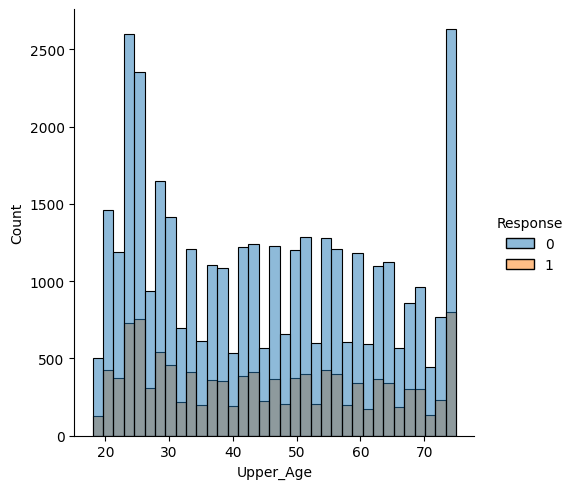

In [44]:
# Upper_Age vs Response
sns.displot(x = 'Upper_Age', data = df, hue = 'Response')

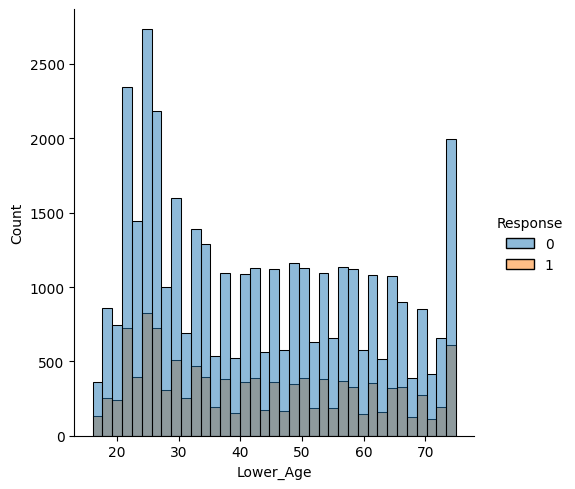

In [45]:
# Lower_Age vs Response
sns.displot(x = 'Lower_Age', data = df, hue = 'Response')

<Axes: xlabel='Is_Spouse', ylabel='count'>

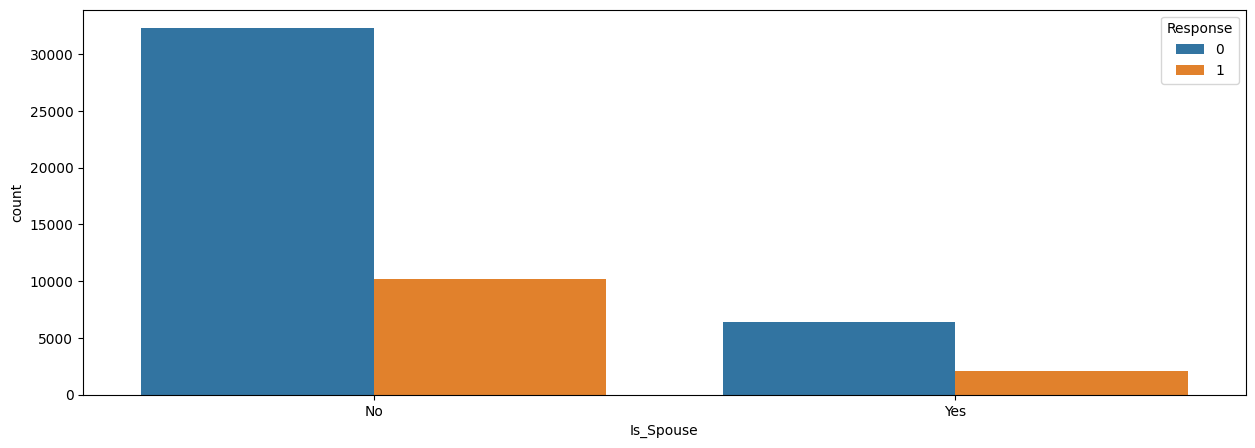

In [46]:
# Is_Spouse vs Response
sns.countplot(x = 'Is_Spouse', data = df, hue = 'Response')

#### Is_Spouse vs. Response:
- **Visualization:** `sns.countplot(x='Is_Spouse', data=df, hue='Response')`
- People haiving No Spouse has a higher positive response rate compared to people haiving spouse,which shows a notably lower count in positive responses.

<Axes: xlabel='Health Indicator', ylabel='count'>

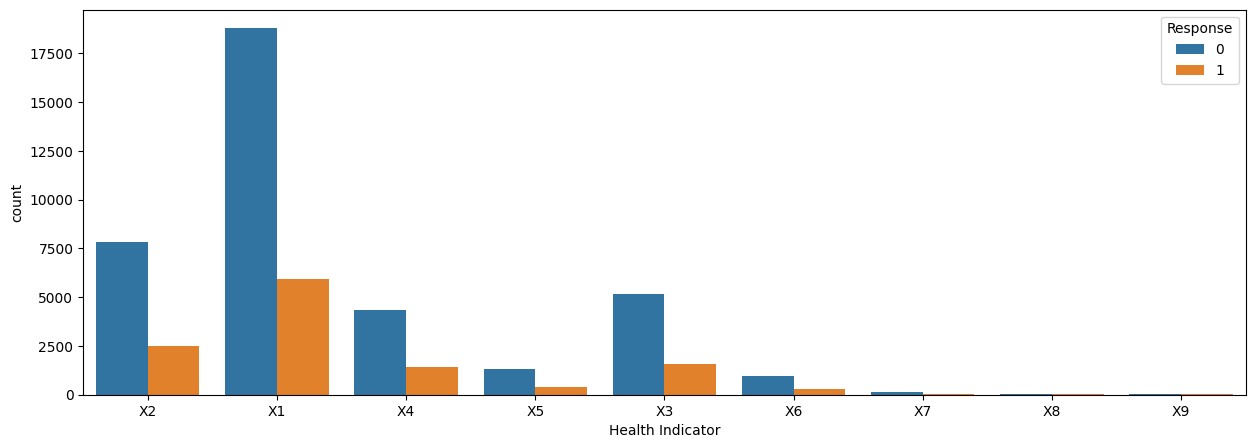

In [47]:
# Health Indicator vs Response
sns.countplot(x = 'Health Indicator', data = df, hue = 'Response')

<Axes: xlabel='Holding_Policy_Duration', ylabel='count'>

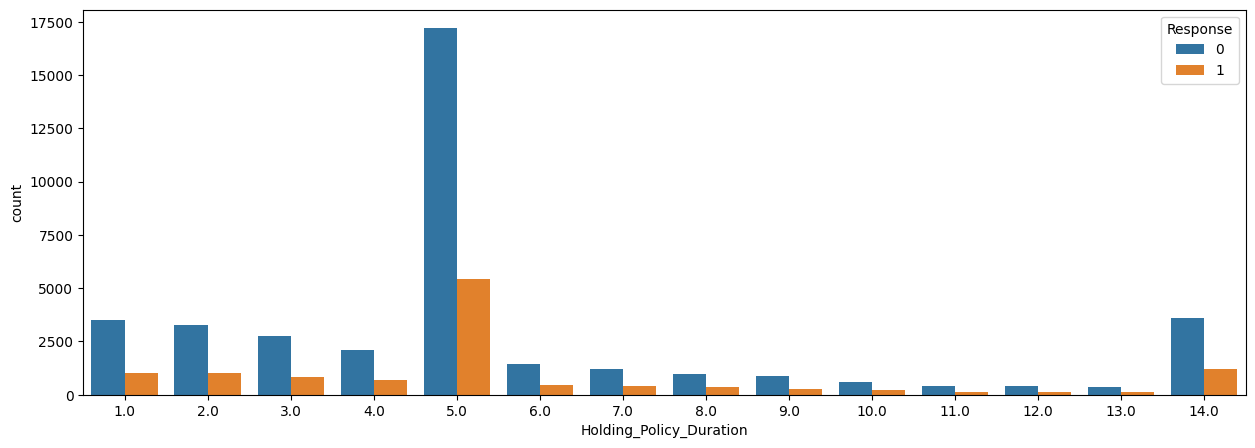

In [48]:
# Holding_Policy_Duration vs Response
sns.countplot(x = 'Holding_Policy_Duration', data = df, hue = 'Response')

<Axes: xlabel='Holding_Policy_Type', ylabel='count'>

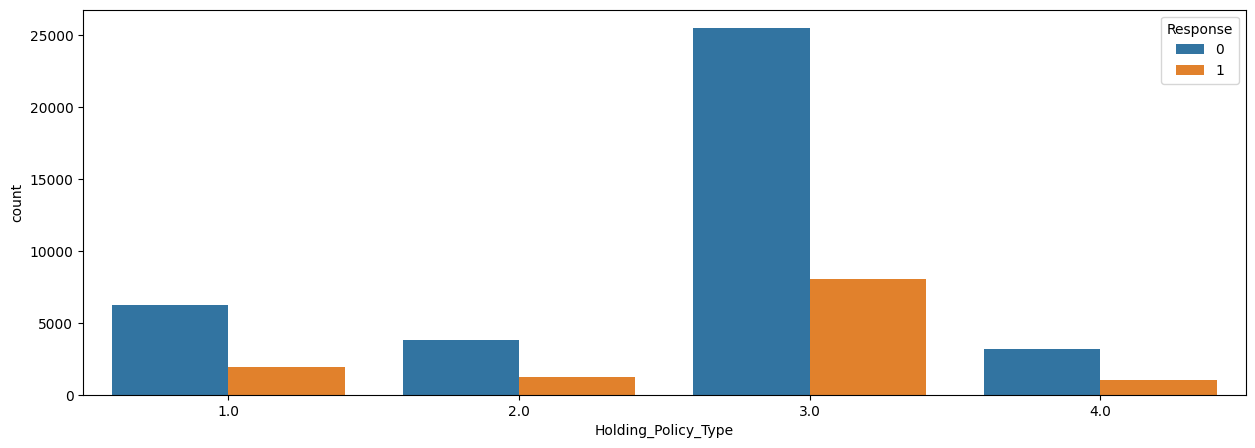

In [49]:
# Holding_Policy_Type vs Response
sns.countplot(x = 'Holding_Policy_Type', data = df, hue = 'Response')

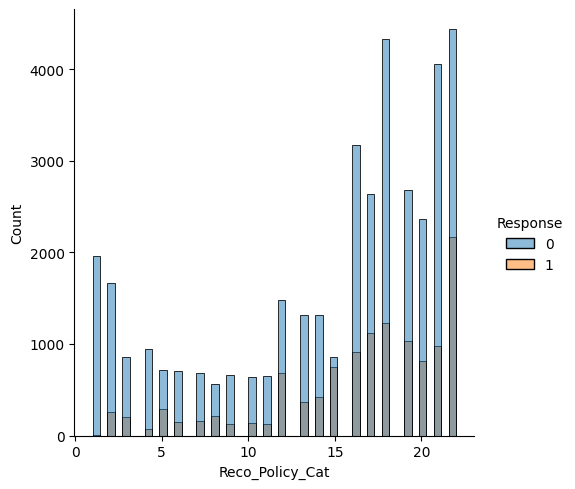

In [50]:
# Reco_Policy_Cat vs Response
sns.displot( x = 'Reco_Policy_Cat', data = df, hue = 'Response')

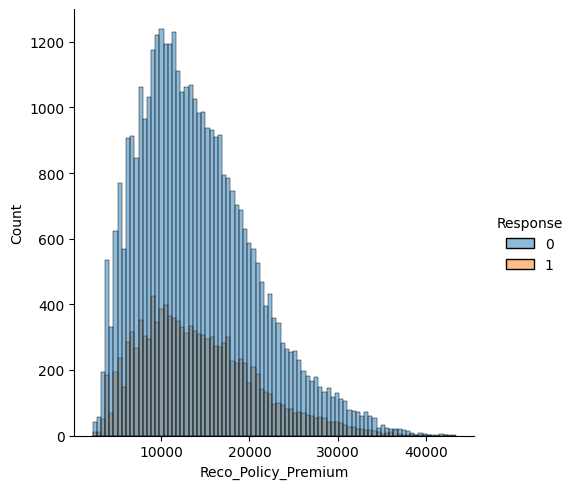

In [51]:
# Reco_Policy_Premium vs Response
sns.displot(x = 'Reco_Policy_Premium', data = df, hue = 'Response')

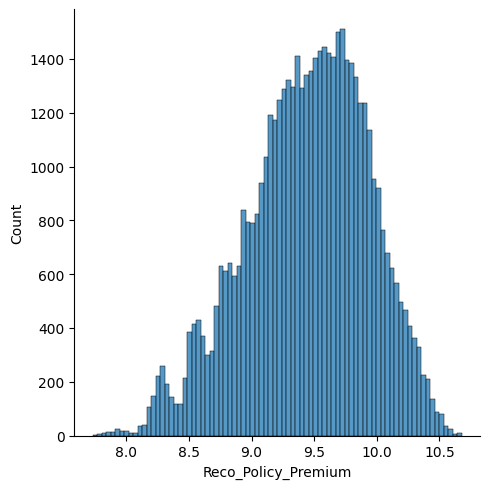

In [52]:
log1p = np.log1p(df['Reco_Policy_Premium'])
sns.displot(log1p)

### Multivariate Analysis

<Axes: >

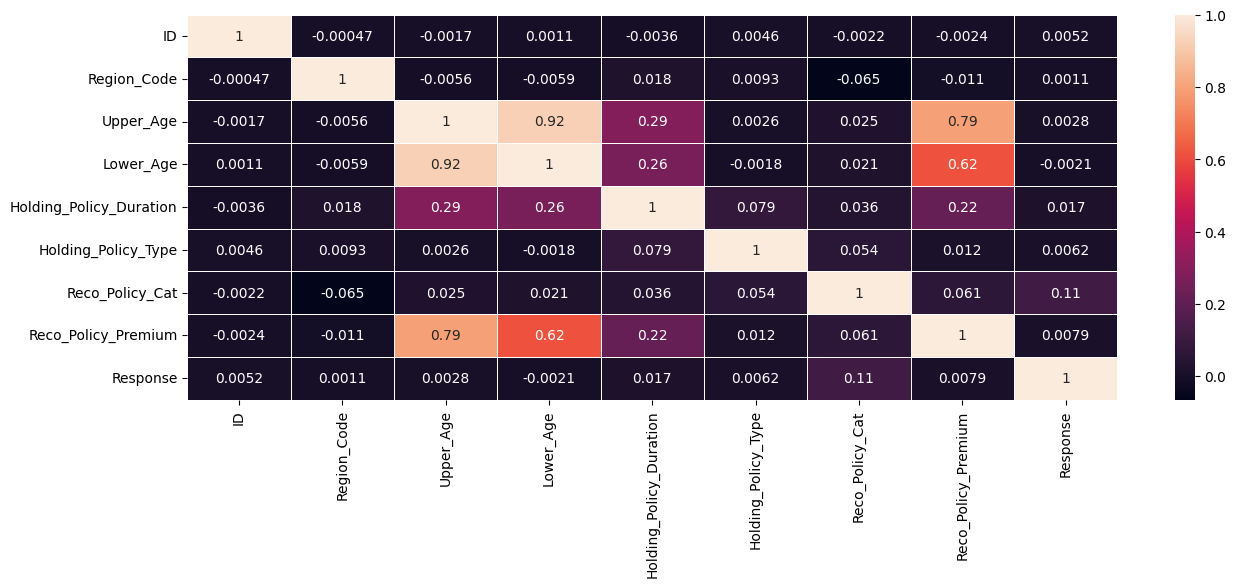

In [59]:
# Data Correlation
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, linewidths= 0.7)

#### Data Correlation:
- **Visualization:** `sns.heatmap(corr, annot=True, linewidths=0.7)`
- Some notable correlations include a strong positive correlation between 'Upper_Age' and 'Lower_Age' (0.92) and positive correlations between 'Upper_Age' and 'Reco_Policy_Premium' (0.79) and 'Lower_Age' and 'Reco_Policy_Premium' (0.62). These correlations are essential to consider during feature engineering.

## 4. Feature Engineering:
Certain features are dropped ('ID', 'Lower_Age') as they might not contribute significantly to the prediction task.
'Health Indicator' and 'City_Code' are transformed to group specific categories for better representation.

These interpretations provide insights into the relationships between various features and the target variable, helping guide the feature engineering process and subsequent model building. Adjustments to the interpretations can be made based on a deeper understanding of the dataset and business context.

In [60]:
df.drop(['ID', 'Lower_Age'], axis = 1, inplace = True)

In [62]:
# Grouping X6,X7,X8,X9 into a single group due to low value count
df['Health Indicator'].replace(('X1','X2','X3','X4','X5','X6','X7','X8','X9'), (0,1,2,3,4,4,4,4,4), inplace = True)

# Grouping 10 areas into 1 area
df['City_Code'].replace(('C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
                           'C11','C12','C13','C14','C15','C16','C17','C18','C19','C20',
                           'C21','C22','C23','C24','C25','C26','C27','C28','C29','C30',
                           'C31','C32','C33','C34','C35','C36'), (0,0,0,0,0,0,0,0,0,0,
                                                            1,1,1,1,1,1,1,1,1,1,
                                                            2,2,2,2,2,2,2,2,2,2,
                                                            3,3,3,3,3,3), inplace = True)

df['Is_Spouse'].replace(('Yes','No'), (1,0), inplace = True)
df['Reco_Insurance_Type'].replace(('Individual', 'Joint'), (1,0), inplace = True)
df['Accomodation_Type'].replace(('Owned','Rented'), (0,1), inplace = True)

In [ ]:
#data['Reco_Policy_Premium'] = np.log1p(data['Reco_Policy_Premium'])

In [63]:
df['Response'].value_counts()

,count
Response,
0,38673
1,12209


## Creating Unstructured column


In [66]:
import random
import pandas as pd
import numpy as np

np.random.seed(50882)
random.seed(50882)

n = 50882

high_intent_templates = [
    "I need a {product} insurance quote urgently, please share coverage details.",
    "Can you help me with the {product} policy premium and benefits?",
    "Looking to buy {product} insurance, want to know about price and coverage."
]

medium_intent_templates = [
    "I am comparing {product} insurance, what is the approximate premium?",
    "Need some info about {product} coverage, not sure which plan fits.",
    "Checking {product} insurance prices, do you provide quotes online?"
]

low_intent_templates = [
    "Just browsing {product} insurance options, not sure yet.",
    "Do I even need {product} insurance? Just checking.",
    "Not really interested, just wanted to see how much it costs."
]

products = ["car", "health", "life", "travel"]

def generate_inquiry():
    intent_level = np.random.choice(["High", "Medium", "Low"], p=[0.3, 0.5, 0.2])
    product = np.random.choice(products)

    # Generate text & sentiment
    if intent_level == "High":
        text = random.choice(high_intent_templates).format(product=product)
        sentiment = random.uniform(0.7, 1.0)
        convert_prob = np.random.uniform(0.7, 0.9)  # High conversion chance
    elif intent_level == "Medium":
        text = random.choice(medium_intent_templates).format(product=product)
        sentiment = random.uniform(0.4, 0.7)
        convert_prob = np.random.uniform(0.4, 0.6)  # Medium conversion chance
    else:
        text = random.choice(low_intent_templates).format(product=product)
        sentiment = random.uniform(0.0, 0.4)
        convert_prob = np.random.uniform(0.05, 0.2)  # Low conversion chance

    length = len(text.split())
    keywords = ["quote", "price", "coverage", "premium", "policy"]
    keyword_flags = {kw: int(kw in text.lower()) for kw in keywords}

    # Final conversion outcome


    return {
        "inquiry_text": text,
        "intent_level": intent_level,
        "sentiment_score": round(sentiment, 3),
        "length": length,
        **keyword_flags
    }

# Generate synthetic dataset
synthetic_text_df = pd.DataFrame([generate_inquiry() for _ in range(n)])
synthetic_text_df.head(10)

,inquiry_text,intent_level,sentiment_score,length,quote,price,coverage,premium,policy
0,"I am comparing car insurance, what is the appr...",Medium,0.420,10,0,0,0,1,0
1,"Need some info about health coverage, not sure...",Medium,0.402,11,0,0,1,0,0
2,"Checking life insurance prices, do you provide...",Medium,0.517,9,1,1,0,0,0
3,"I am comparing travel insurance, what is the a...",Medium,0.416,10,0,0,0,1,0
4,"Checking health insurance prices, do you provi...",Medium,0.530,9,1,1,0,0,0
5,"Need some info about car coverage, not sure wh...",Medium,0.678,11,0,0,1,0,0
6,Can you help me with the travel policy premium...,High,0.843,11,0,0,0,1,1
7,"Checking travel insurance prices, do you provi...",Medium,0.473,9,1,1,0,0,0
8,"Just browsing car insurance options, not sure ...",Low,0.382,8,0,0,0,0,0
9,Can you help me with the car policy premium an...,High,0.789,11,0,0,0,1,1


In [67]:
synthetic_text_df['intent_level'].replace(('Low','Medium','High'), (0,1,2), inplace = True)

In [68]:
synthetic_text_df.head(2)

,inquiry_text,intent_level,sentiment_score,length,quote,price,coverage,premium,policy
0,"I am comparing car insurance, what is the appr...",1,0.420,10,0,0,0,1,0
1,"Need some info about health coverage, not sure...",1,0.402,11,0,0,1,0,0


For each particular record certain columns are created which provide information about the text like the sentiment..
.

In [69]:
# Keep only columns you want to add
synthetic_cols = ['inquiry_text','intent_level','sentiment_score', 'length', 'quote', 'price', 'coverage', 'premium', 'policy']

# Concatenate horizontally (axis=1)
df= pd.concat([df.reset_index(drop=True), synthetic_text_df[synthetic_cols].reset_index(drop=True)], axis=1)

print(df.shape)
df.head(10)


(50882, 21)


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,Response,inquiry_text,intent_level,sentiment_score,length,quote,price,coverage,premium,policy
0,0,1144,0,1,60,0,1,14.0,2.0,17,...,1,"I am comparing car insurance, what is the appr...",1,0.420,10,0,0,0,1,0
1,0,3282,1,1,23,0,0,5.0,3.0,14,...,0,"Need some info about health coverage, not sure...",1,0.402,11,0,0,1,0,0
2,1,718,0,0,75,1,0,14.0,2.0,10,...,0,"Checking life insurance prices, do you provide...",1,0.517,9,1,1,0,0,0
3,0,6015,1,1,59,0,0,1.0,2.0,20,...,0,"I am comparing travel insurance, what is the a...",1,0.416,10,0,0,0,1,0
4,0,178,1,1,62,0,1,5.0,3.0,22,...,0,"Checking health insurance prices, do you provi...",1,0.530,9,1,1,0,0,0
5,0,1742,1,1,29,0,3,6.0,2.0,21,...,1,"Need some info about car coverage, not sure wh...",1,0.678,11,0,0,1,0,0
6,0,1484,0,0,35,1,0,3.0,1.0,2,...,0,Can you help me with the travel policy premium...,2,0.843,11,0,0,0,1,1
7,1,975,0,1,57,0,3,5.0,3.0,19,...,0,"Checking travel insurance prices, do you provi...",1,0.473,9,1,1,0,0,0
8,0,23,1,1,25,0,0,1.0,4.0,3,...,0,"Just browsing car insurance options, not sure ...",0,0.382,8,0,0,0,0,0
9,0,1728,1,1,30,0,3,5.0,3.0,16,...,1,Can you help me with the car policy premium an...,2,0.789,11,0,0,0,1,1


In [70]:
import re

def clean_text(text):
    text = text.strip()  # remove leading/trailing spaces
    text = re.sub(r"\s+", " ", text)  # collapse multiple spaces
    text = re.sub(r"http\S+|www\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z0-9\s\.,!?]", "", text)  # keep basic chars/punct
    return text

df["clean_text"] = df["inquiry_text"].apply(clean_text)

In [71]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Generate embeddings
embeddings = model.encode(df["clean_text"].tolist(), show_progress_bar=True)

# Convert to DataFrame
emb_df = pd.DataFrame(embeddings, columns=[f"emb_{i}" for i in range(embeddings.shape[1])])

# Merge with main dataset
df_bert = pd.concat([df.reset_index(drop=True), emb_df], axis=1)

print(df_bert.head())

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1591 [00:00<?, ?it/s]

   City_Code  Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  \
0          0         1144                  0                    1         60   
1          0         3282                  1                    1         23   
2          1          718                  0                    0         75   
3          0         6015                  1                    1         59   
4          0          178                  1                    1         62   

   Is_Spouse  Health Indicator  Holding_Policy_Duration  Holding_Policy_Type  \
0          0                 1                     14.0                  2.0   
1          0                 0                      5.0                  3.0   
2          1                 0                     14.0                  2.0   
3          0                 0                      1.0                  2.0   
4          0                 1                      5.0                  3.0   

   Reco_Policy_Cat  ...   emb_374   em

In [72]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Encode intent_level
df_bert["intent_level"] = df_bert["intent_level"].map({"Low":0, "Medium":1, "High":2})

# Features: embeddings + structured
X = df_bert.drop(columns=["inquiry_text", "clean_text","Response"])
y = df_bert["Response"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model
xgb = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42
)
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      7759
           1       0.39      0.05      0.08      2418

    accuracy                           0.76     10177
   macro avg       0.58      0.51      0.47     10177
weighted avg       0.68      0.76      0.68     10177

ROC-AUC: 0.6142033515655823


In [74]:
#-----------------------------------------------------------------------------------------------------------------------------------------------


🔹 Sample Predictions:
       Actual  Predicted  Probability
10852       0          0     0.213919
23034       0          0     0.339006
27232       0          0     0.381100
35409       1          0     0.240805
11901       0          0     0.132274
10389       0          0     0.265402
19271       0          0     0.213877
29574       1          0     0.334375
42630       0          0     0.337053
42862       1          0     0.061475
